In [448]:

import mpld3 
mpld3.enable_notebook()

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import datetime, math
import scipy.stats as sci

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

style.use('ggplot')
import seaborn as sns
sns.set()


In [449]:
df_nep = pd.read_csv("stockprice_15_04_2019-25_10_2017.csv")
df_nep.tail()

,date,traded_companies,no_of_transaction,max_price,min_price,closing_price,traded_shares,amount,previous_closing,difference_rs
182650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
len(df_nep)

182655

In [451]:
df_AFL = df_nep.loc[df_nep['traded_companies'] == 'Api Finance Limited']
df_AFL.head()


,date,traded_companies,no_of_transaction,max_price,min_price,closing_price,traded_shares,amount,previous_closing,difference_rs
0,4/15/2010,Api Finance Limited,46.0,247.0,240.0,240.0,1520.0,375070.0,243.0,-3.0
117,4/20/2010,Api Finance Limited,4.0,240.0,236.0,240.0,50.0,11960.0,240.0,0.0
294,4/25/2010,Api Finance Limited,2.0,240.0,240.0,240.0,20.0,4800.0,240.0,0.0
413,4/27/2010,Api Finance Limited,6.0,240.0,240.0,240.0,60.0,14400.0,240.0,0.0
475,4/28/2010,Api Finance Limited,9.0,240.0,236.0,236.0,430.0,102960.0,240.0,-4.0


In [454]:
df_AVHD = df_nep.loc[df_nep['traded_companies'] == 'Arun Valley Hydropower Development Co. Ltd.']
df_AVHD
df_AVHD.to_csv(r'AVHD.csv', index = None)


In [455]:
df_AFL.isnull().sum()

date                 0
traded_companies     0
no_of_transaction    0
max_price            0
min_price            0
closing_price        0
traded_shares        0
amount               0
previous_closing     0
difference_rs        0
dtype: int64

In [456]:
df_AFL_REDUCED = df_AFL.drop(columns=['traded_companies','no_of_transaction', 'traded_shares','difference_rs'])
df_AFL_REDUCED.size

1662

In [481]:
df_AFL_REDUCED_NAME = df_AFL_REDUCED.rename(columns={"max_price": "high", "min_price": "low", "amount": "volume", "closing_price": "close", "previous_closing": "open"})
df_AFL_REDUCED_NAME.tail()

df_AFL_REDUCED_NAME.to_csv(r'AFL.csv', index=None)

In [467]:
#Setting index as date
df_AFL_REDUCED_NAME['date'] = pd.to_datetime(df_AFL_REDUCED_NAME['date'])
df_AFL_REDUCED_NAME.index = df_AFL_REDUCED_NAME['date']
df_AFL_REDUCED_NAME.size
df_AFL_REDUCED_NAME


In [459]:
df_new = df_AFL_REDUCED_NAME.drop(columns=['date'])

In [445]:
df_new.tail()
# df_new.to_csv(r'AFL.csv', index = None)
# print(len(df_new))

,high,low,close,volume,open
date,,,,,
2012-07-17,107.0,103.0,107.0,270442.0,102.0
2012-07-18,109.0,106.0,108.0,72030.0,107.0
2012-07-19,106.0,104.0,104.0,31340.0,108.0
2012-07-22,110.0,106.0,109.0,232132.0,104.0
2012-07-23,109.0,105.0,107.0,243920.0,109.0


In [435]:
# df_new['HL_PCT'] = (df_new['high'] - df_new['low']) / df_new['close'] * 100
# df_new['PCT_change'] = (df_new['close'] - df_new['open']) / df_new['open'] * 100

# df = df_new[['close', 'HL_PCT', 'PCT_change', 'volume']]
# # df.to_csv(r'AFL.csv', index = None)
# df.head()

,close,HL_PCT,PCT_change,volume
date,,,,
2010-04-15,240.0,2.916667,-1.234568,375070.0
2010-04-20,240.0,1.666667,0.000000,11960.0
2010-04-25,240.0,0.000000,0.000000,4800.0
2010-04-27,240.0,0.000000,0.000000,14400.0
2010-04-28,236.0,1.694915,-1.666667,102960.0


3


,close,HL_PCT,PCT_change,volume,label
date,,,,,
2010-04-15,240.0,2.916667,-1.234568,375070.0,240.0
2010-04-20,240.0,1.666667,0.000000,11960.0,236.0
2010-04-25,240.0,0.000000,0.000000,4800.0,240.0
2010-04-27,240.0,0.000000,0.000000,14400.0,225.0
2010-04-28,236.0,1.694915,-1.666667,102960.0,226.0
...,...,...,...,...,...
2012-07-17,107.0,3.738318,4.901961,270442.0,109.0
2012-07-18,108.0,2.777778,0.934579,72030.0,107.0
2012-07-19,104.0,1.923077,-3.703704,31340.0,NaN


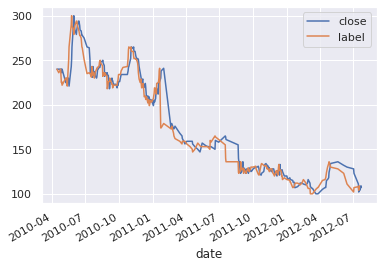

In [436]:
forecast_col = 'close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

df['label'] = df[forecast_col].shift(-forecast_out)

df['close'].plot()
df['label'].plot()
plt.legend(loc=1)

# df.to_csv(r'main.csv', index = None)
df

In [368]:
# sns.regplot(x="PCT_change", y="label", data=df)
# plt.ylim(0,)

# pearson correlation

# P-value

# pearson_coeff, p_value = sci.pearsonr(df["PCT_change"], df["label"])
# pearson_coeff, p_value

In [369]:

# x = df.index
# y = df['close']

# plt.scatter(x, y, color='green', s=1)
# plt.title('close vs date', fontsize=14)
# plt.xlabel('', fontsize=14)
# plt.ylabel('', fontsize=14)
# plt.grid(True)
# plt.show()
df

,close,HL_PCT,PCT_change,volume,label
date,,,,,
2010-04-15,240.0,2.916667,-1.234568,375070.0,240.0
2010-04-20,240.0,1.666667,0.000000,11960.0,236.0
2010-04-25,240.0,0.000000,0.000000,4800.0,240.0
2010-04-27,240.0,0.000000,0.000000,14400.0,225.0
2010-04-28,236.0,1.694915,-1.666667,102960.0,226.0
...,...,...,...,...,...
2012-07-17,107.0,3.738318,4.901961,270442.0,109.0
2012-07-18,108.0,2.777778,0.934579,72030.0,107.0
2012-07-19,104.0,1.923077,-3.703704,31340.0,NaN


In [370]:
#Defining Features & Labels
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
# X = preprocessing.normalize(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

print(len(X), len(y))
print(len(X_lately))
print(X)
print(y)

274 274
3
[[ 0.99301559  0.91736952 -0.31067642  6.70251226]
 [ 0.99301559  0.21575014  0.07055187 -0.44623274]
 [ 0.99301559 -0.71974236  0.07055187 -0.58719557]
 ...
 [-1.38387946  3.68257531 -2.43319069  3.10134501]
 [-1.29776007  1.37855858  1.58425244  4.64264365]
 [-1.28053619  0.83941181  0.35914525  0.73639818]]
[240. 236. 240. 225. 226. 222. 230. 230. 226. 221. 243. 251. 265. 290.
 300. 289. 284. 279. 284. 289. 294. 294. 289. 284. 283. 278. 278. 275.
 265. 264. 251. 235. 236. 235. 235. 231. 243. 233. 234. 237. 233. 230.
 232. 236. 240. 240. 242. 242. 242. 244. 248. 249. 250. 247. 244. 232.
 236. 233. 236. 233. 233. 218. 219. 226. 226. 230. 227. 227. 223. 223.
 219. 222. 222. 222. 226. 226. 230. 234. 234. 234. 238. 242. 243. 252.
 262. 265. 263. 265. 260. 260. 255. 252. 252. 251. 251. 247. 243. 236.
 232. 229. 225. 229. 223. 219. 220. 224. 220. 209. 210. 206. 209. 202.
 206. 205. 199. 205. 203. 207. 213. 219. 218. 215. 212. 224. 224. 225.
 226. 230. 238. 241. 174. 174. 179. 173

/home/sunil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[127.29479278 116.38214368 130.27709807 207.84634693 125.35036223
 165.18539226 259.15286023 120.31403256 245.3249971  133.53456852
 127.67806272 110.85833759 125.44422566 223.41647025 248.26852018
 264.82877752 219.49785851 157.20128304 234.03060823 129.63756166
 228.86614227 202.63634061 124.91507121 156.652945   230.05122748
 222.59022602 256.2530294  112.658056   125.40380868 231.14280918
 158.50944585 203.97290664 221.60979119 118.57940212 215.78300928
 172.14141763 115.63633778 235.78925463 214.54853298 119.02698217
 229.33030159 125.05269269 126.06427693 215.97548186 278.75869191
 125.34926836 130.35813594 129.38672409 124.02546855 230.63607877
 127.39162525 171.27340845 273.55664526 219.44801234 128.5973976 ]
   Actual   Predicted
0   121.0  127.294793
1   130.0  116.382144
2   127.0  130.277098
3   202.0  207.846347
4   125.0  125.350362
5   155.0  165.185392
6   260.0  259.152860
7   116.0  120.314033
8   232.0  245.324997
9   132.0  133.534569


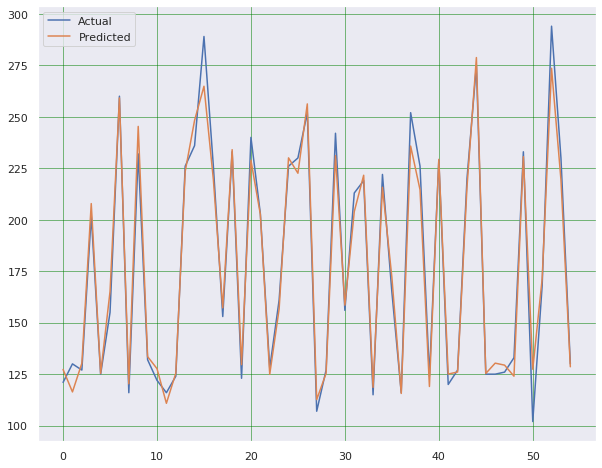

AttributeError: 'LinearRegression' object has no attribute 'rsquared'

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
clf = LinearRegression() 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_test.head(10))
df_test.plot(figsize=(10,8))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

print(clf.rsquared)

Accuracy = clf.score(X_test, y_test)
print("The R^2 value is:", Accuracy)
# sns.regplot(x=y_test, y=, data=df)
# plt.ylim(0,)


3
3 55 274 [103.65456454 109.08232661 105.07794207] 0.9779978431407913 3


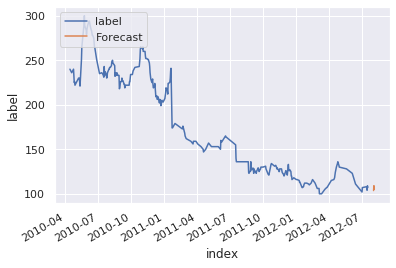

In [493]:
from sklearn.metrics import mean_squared_error, r2_score

forecast_set = clf.predict(X_lately)
print(len(forecast_set))
print(len(X_lately), len(y_test), len(X),forecast_set, Accuracy, forecast_out)
df['Forecast'] = np.nan


last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

    

df['label'].plot()
df['Forecast'].plot()

plt.legend(loc=2)
plt.xlabel('index')
plt.ylabel('label')
plt.show()

# sns.regplot(x=y_test, y=forecast_set, data=df)
# plt.ylim(0,)

# rmsd = np.sqrt(mean_squared_error(y_test, X_test))      
# r2_value = r2_score(Y_test, forecast_out)     